In [1]:
import os
import pandas as pd
import janitor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="notebook", font_scale=1.05, 
              style='whitegrid')
from graph_utils import save_mpl_fig

LF_FP_NYT = '../../readable_news_lf/nyt.zip'
FP_NYT = '../data/nyt_1987_2007_textstat.csv.gz'
SAVEPATH = '../figs/'

In [2]:
# Cats (fold cell)
arts = ("Art and Leisure Desk", "Museums", "Arts Almanac Supplement", "Cultural Desk - SummerTimes Supplement",
	      "Cultural", "Arts", "The Arts", "Arts/Cultural Desk", "Cultural Desk", "Arts and Leisure Desk",
	      "Arts & Leisure", "Cultural Desk;", "Arts & Liesure Desk", "The Art/Cultural Desk", "Cultural/Arts Desk",
	      "The Arts/Cultural Desk", "Tha Arts/Cultural Desk", "<br>The Arts/Cultural Desk", "The Arts\\Cultural Desk",
	      "Summer Arts Supplement", "Arts & Ideas/Cultural Desk", "Art & Ideas/Cultural Desk", "The Arts/Cultrual Desk",
	      "Cultural desk")

style = ("Style", "Style Desk", "Stlye Desk", "Styles of the Times Desk", "Men's Fashions of The Times Magazine",
	      "Style Desk;", "Style of The Times", "Styles of The Times Desk", "Styles of The TimesStyles of The Times",
	      "Styles of the Times", "Men's Fashions of The Times", "Men's Fashions of The TimesMagazine",
	      "Men's Fashion of The Times Magazine", "Men's Fashion of the Times Magazine", "T: Women's Fashion Magazine",
	      "T: Men's Fashion Magazine", "Thursday Styles Desk", "Style and Entertaining Magazine",
	      "Men's Fashions of the Times Magazine", "Fashions of the Times Magazine", "Fashions of The Times Magazine",
	      "Living DeskStyle Desk", "House & Home/Style Desk", "Styles of The Times", "Thursday Styles",
	      "Style and Entertaining MagazineStyle and Enter") 

books = ("Book Review Desk", "Book Review Dest", "Book Reviw Desk")

travel = ("TravelDesk", "Travel Desk", "Sophisticated Traveler Magazine", "T: Travel Magazine", "Travel DeskTravel Desk", "Escapes")

local = ("Metropitan Desk", "Metroploitan Desk", "Metropoliton Desk", "Metropolitan", "Metropolitan Desk;",
	       "Metrpolitan Desk", "Metropolian Desk", "Metropoltan Desk", "Metropolitan Desak", "Metropolitan Deski",
	       "Metroplitan Desk", "qMetropolitan Desk", "Metrolpolitian Desk", "Metropolitain Desk", "Metroploitian Desk",
	       "Metropolitan Desk", "Connecticut Weekly Desk", "New Jersey Desk", "New Jersey Weekly Desk",
	       "Westchester Weekly Desk", "Westchester Weekly Deask", "Long Island Weekly Desk", "Long Island Waekly Desk",
	       "Long Island Weekly", "Long Island Desk", "New Jersey Weely Desk", "The City Weekly Desk", "The City Weekly",
	       "The City" , "The City Weekly Section", "The City Desk", "City Weekly Desk", "The City Weekly/Queens",
	       "The City Weelky Desk", "TheCity Weekly Desk", "The City/Weekly Desk", "New Jersey/Weekly Desk",
	       "The City Weeky Desk", "Connecticut Desk", "Metropoliatn Desk", "Metropoltian Desk", "Metro Desk",
	       "The City Weekly Deslk", "The City Weekly Desk\n The City Weekly Desk", "The City Weekl Desk",
	       "Metropolitan DeskMetropolitan Desk", "Connecticut Weekly desk", "New Jerey Weekly Desk",
	       "Metropolitan Desk Section D", "Metropolitian Desk", "Metropolitan Dsk", "Metropolitan Deskreign Desk")

sports = ("Sport Desk", "Sports", "Sports Desk", "Sports Deks", "Adventure Sports", "Sports DEsk",
	        "Sports DeskSports Desk", "Sports Deskk")

gensoft = ("Holiday Times Supplement", "Spring Times Supplement" , "Summer Times Supplement",
	         "Summer Times Supplementa", "Autumn Times Supplement", "Winter Times Supplement",
	         "Home Entertaining Magazine",  "Television Desk", "Social Desk", "House & Home/Style",
	         "Style and Entertaining Magaziner", "House & Home\\Style Desk","Wireless Living", "T: Design Magazine",
	         "T: Living Magazine", "Televison Desk", "T: Beauty", "THoliday", "Play", "Play Magazine",
	         "Home Design Desk", "Home Design Magazine", "Entertaining Magazine", "Televison", "Society Dek",
	         "Springs Times Supplement",  "Television", "Living Desk;", "Society DeskMetropolitan Desk", "Technology",
	         "Business Travel", "The New Season Magazine", "House and Home Style", "The Marathon", "Society Desk" )

realest = ("Real Estate", "Real Estate Desk", "Commercial Real Estate Report", "Residential Real Estate Report",
	        "Real Estate Desk", "Real Estate desk", "Real Estate desk", "Real Estate", "Commercial Real Estate Report",
	        "Residential Real Estate Report", "Real Estate desk", "Commercial Real Estate Report", "Residential Real Estate Report",
	        "Real Estate Desk")

persfin = ("Careers Supplement Desk", "Careers Supplement" , "Financial Planning Guide: Personal Investing",
	        "Financial Planning Guide: Personal", "Workplace", "Retirement", "Financial Planning Guide: Your Taxes",
	        "Job Market Desk", "Job Market", "Your Taxes Supplement", "Personal Investing Supplement Desk")

bizfin = ("Financial Desk", "Financial", "Business Desk", "Business/Finance Desk", "Business/Financial Desk;",
	       "Financial/Business Desk", "Business/Foreign Desk", "Money and Business/Financial Desk",
	       "Money & Business/Financial Desk", "Money & Business/Financial Desk", "Monet and Business/Financial Desk",
	       "Money and Busines/Financial Desk", "Money andBusiness/Financial Desk", "Money and Business/FinancialDesk",
	       "Business/FinancialDesk", "Business/Finacial Desk", "Business/Financial Desk Section D", "Money and Business/Financial",
	       "Money & Businees Desk", "Business Day/Financial", "Money and Business/Financial DeskMoneyand Bus",
	       "Business\\Financial Desk", "Business/Finanical Desk", "Financial Desk;", "Money and Business/Financial DeskMoney and Bus",
	       "Business/Financial desk", "DealBook", "Moneyand Business/Financial Desk", "SundayBusines", "SundayBusinessSundayBusiness",
	       "SundayBusiness", "Business/Financial", "Business/Financial DeskBusiness/Financial Desk", "Money and Business/Fiancial Desk",
	       "Small Business", "Business World Magazine", "Sunday Business", "BIZ", "The Business of Green",
	       "The Business of Health", "Retail")

cars = ("Autmobiles", "Automobile Show Desk", "Automobies", "Automoiles", "AuTomobiles", "Automobile Desk", "Cars",
	      "Automobliles", "Automoblies", "Autombiles", "Automobile", "Automobiles Desk", "Automobles", "Automobiles")

leisure = ("Arts CultureStyle Leisure", "Weekend Desk", "Weekend Desk", "Leisure/Weekend Desk", "Weekend DeskWeekend Desk",
             "Weekend Desk;", "Vacation", "Arts and Leisure Desk Desk", "Movies, Performing Arts/Weekend Desk",
             "Movies,Performing Arts/Weekend Desk", "Summer Movies", "Movies, Performing Arts/Weekend DeskMovies, Pe",
             "Business Financial Desk", "Arts and Leisure")

health = ("Good Health Magazine", "The Good Health Magazine", "Health and Fitness", "Health&Fitness",
	        "Women's HealthWomen's Health", "Women's Health", "Health & Fitness", "Health & Fitness Desk" ,
	        "Men's Health", "Men & Health", "PersonalHealth", "Health")

fnews = ("Foreign desk", "Foriegn Desk", "Foreign DEsk", "Foreignl Desk", "1;             Foreign Desk", "Foreign Desk")

natdesk = ("National Desk", "National Edition - Final", "National Deskl", "Natioanl Desk", "National Dsek",
	         "National News", "National", "National desk", "National DeskNational Desk", "National Desk;"  )

living = ("Living Desk  Section C", "Living Desk", "Living DeskLiving Desk")

classifieds = ("Classified", "Classified Desk", "Classifed", "Classifieds", "Classsified", "Classfied", "classified" )

dining= ("Dining In, Dining Out", "Dining in, Dining out/Style Desk" , "Dining In/Dining Out" ,
	       "Dining In/Dining Out/Living Desk", "Dining In, Dining Out/Style Desk", "Dining In, Dining Out/Cultural Desk",
	       "Dining, Dining Out/Cultural Desk", "Dining In, Dining Out/Style DeskDining In, Din"  )

misc = ("Survey of Education Desk", "Summer Survey of Education", "Op-Ed at 20 Supplement", "World of New York Magazine",
          "Education Life SupplementMetropolitan Desk" ,  "Education Life", "Education Life Supplement", "Education Life Supple", 
          "Magazine DeskMetropolitan Desk", "Citcuits", "Circuits", "Circuits Desk","CircuitsCircuits",
          "Education Life SupplementEducation Life Supple", "E-Commerce", "Entrepreneurs", "The Millennium",
          "The Millenium", "Generations", "Flight", "Week" , "Metro", "Working", "Giving",  "The Year in Pictures",
          "The Year In Pictures" , "2005: The Year In Pictures", "ContinuousNews", "Voter Guide 2004" )  

home = ("Home Desk", "Home DeskHome Desk", "Home Desk;", "Home Desk;", "Home Desk", "Home DeskHome Desk")                                   
wkinrev = ("Week in Review desk", "Week in Review Desk", "Week In Review", "Week in Review", "Week in Review Desk",
	        "Week in Review desk", "Weekin Review Desk", "Week In Review Desk", "Week in review desk",
	        "Week in Review Deskn", "Week In Review DeskWeek In Review Desk")

edit = ("Editorial desk", "Editoral Desk", "Editorial Desk", "Editorial Desk")

science = ("Science Desk", "Science","Science Desk;", "The Natural World", "Science Desk")

obits = ("Obituary",  "Obits", "Obituary")

mgz = ("Magazine Desk", "New York, New York Magazine", "Magazine", "Magazine Desk", "New York, New York Magazine")                                                                     

news_desk_soft = ("Arts", "Books", "Cars", "Dining", "Gen Soft", "Leisure", "Living", "Sports", "Style", "Travel", "Personal Finance",  "Health", "Real Estate")
onlines_soft = ("Automobiles", "Arts", "Theater", "Dining and Wine", "Movies", "Style", "Books", "Home and Garden", "Sports", "Travel")

In [3]:
# Read in & classify
df = (pd.read_csv(LF_FP_NYT, low_memory=False) 
      .clean_names()
      # Retrieve soft desk news using news desk
      .case_when(
          lambda df: df.news_desk.isin(arts), 'Arts', 
          lambda df: df.news_desk.isin(style), 'Style', 
          lambda df: df.news_desk.isin(books), 'Books', 
          lambda df: df.news_desk.isin(travel), 'Travel', 
          lambda df: df.news_desk.isin(local), 'Local', 
          lambda df: df.news_desk.isin(sports), 'Sports', 
          lambda df: df.news_desk.isin(gensoft), 'Gen Soft', 
          lambda df: df.news_desk.isin(realest), 'Real Estate', 
          lambda df: df.news_desk.isin(persfin), 'Personal Finance', 
          lambda df: df.news_desk.isin(bizfin), 'Business Finance', 
          lambda df: df.news_desk.isin(cars), 'Cars', 
          lambda df: df.news_desk.isin(leisure), 'Leisure', 
          lambda df: df.news_desk.isin(health), 'Health', 
          lambda df: df.news_desk.isin(fnews), 'Foreign News', 
          lambda df: df.news_desk.isin(natdesk), 'National', 
          lambda df: df.news_desk.isin(living), 'Living', 
          lambda df: df.news_desk.isin(classifieds), 'Classifieds', 
          lambda df: df.news_desk.isin(dining), 'Dining', 
          lambda df: df.news_desk.isin(misc), 'Misc', 
          lambda df: df.news_desk.isin(home), 'Home Desk', 
          lambda df: df.news_desk.isin(wkinrev), 'Week in Review', 
          lambda df: df.news_desk.isin(edit), 'Editorial', 
          lambda df: df.news_desk.isin(science), 'Science', 
          lambda df: df.news_desk.isin(obits), 'Obits', 
          lambda df: df.news_desk.isin(mgz), 'Magazine', 
          "na",
          column_name="categories"
      )
      .case_when(
          lambda df: df.categories.isin(news_desk_soft), True,
          False,
          column_name='news_desk_soft'
      )      
      # Retrieve online soft news
      .case_when(
          lambda df: df.online_section.str.contains(';', na=False), np.nan,
          lambda df: df.online_section,
          column_name='online_sectionr'
      )
      .case_when(
          lambda df: df.online_sectionr.isin(onlines_soft), True,
          False,
          column_name='onlines_soft'
      )
      # Retrieve hard vs soft news
      .case_when(
          lambda df: (df.news_desk_soft | df.onlines_soft), 'apolitical',
          'political',
          column_name='news_type'
      )
      .merge((pd.read_csv(FP_NYT, low_memory=False, 
                          usecols=['Unnamed: 0', 'flesch_reading_ease', 'terms', 'uniqueterms', 'ttr', 'mtld'])
              .rename_column('Unnamed: 0', 'oix')
             ), how='right', left_index=True, right_on='oix', validate='1:1'
            )
      # Drop outliers by length
      .pipe(lambda df: 
            df.query(f'terms>{df.terms.quantile(q=0.01)} & terms<{df.terms.quantile(q=0.99)}'))
      .query(f'terms>100')            
     )

df.head(2)

,alternate_url,article_abstract,author_biography,banner,biographical_categories,body,byline,column_name,column_number,correction_date,...,news_desk_soft,online_sectionr,onlines_soft,news_type,oix,flesch_reading_ease,terms,uniqueterms,ttr,mtld
18,NaN,NaN,NaN,NaN,NaN,LEAD: *3*** COMPANY REPORTS ** *3*NATIONAL SEM...,NaN,NaN,3.0,NaN,...,False,Business,False,political,18,45.236522,115.0,57,0.491379,29.000000
36,NaN,NaN,NaN,NaN,NaN,LEAD: JUDITH STILES' new shop offers 50 differ...,Elaine Louie,NaN,4.0,NaN,...,False,NaN,False,political,36,48.611000,324.0,155,0.474006,95.661933


In [4]:
npolitical = len(df.query('news_type=="political"'))
napolitical = len(df.query('news_type=="apolitical"'))

### Bars

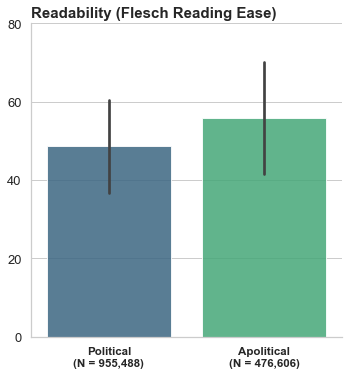

In [5]:
# plot
g = sns.catplot(data=df,
                x='news_type', y='flesch_reading_ease', 
                order=['political', 'apolitical'],
                ci='sd',
                kind='bar', 
                palette='viridis',
                alpha=.85)

plt.xlabel('')
plt.ylabel('')
g.set_xticklabels([f'Political\n(N = {npolitical:,})', 
                   f'Apolitical\n(N = {napolitical:,})'], fontweight='bold')
plt.yticks(range(0,100,20), size=13)
plt.title('Readability (Flesch Reading Ease)', fontweight='bold', loc='left', size=15)

save_mpl_fig(os.path.join(SAVEPATH, 'nyt_hardnews_read'))

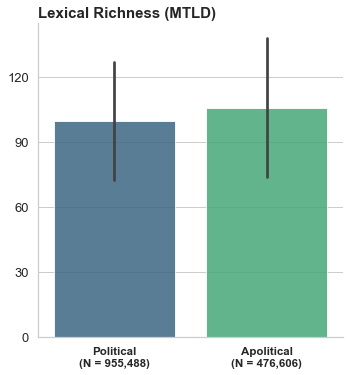

In [6]:
# plot
g = sns.catplot(data=df,
                x='news_type', y='mtld', 
                order=['political', 'apolitical'],
                ci='sd',
                kind='bar', 
                palette='viridis',
                alpha=.85)

plt.xlabel('')
plt.ylabel('')
g.set_xticklabels([f'Political\n(N = {npolitical:,})', 
                   f'Apolitical\n(N = {napolitical:,})'], fontweight='bold')
plt.yticks(range(0,140,30), size=13)
plt.title('Lexical Richness (MTLD)', fontweight='bold', loc='left', size=15)

save_mpl_fig(os.path.join(SAVEPATH, 'nyt_hardnews_lex'))

In [7]:
dow_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_short = [day[:3] for day in dow_list]
dow_short

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

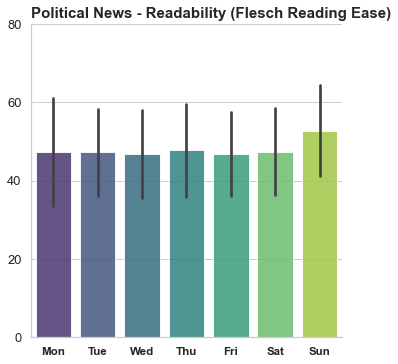

In [8]:
# plot
g = sns.catplot(data=df.query('news_type=="political"'),
                x='day_of_week', y='flesch_reading_ease', 
                order=dow_list,
                ci='sd',
                kind='bar', 
                palette='viridis',
                alpha=.85)

plt.xlabel('')
plt.ylabel('')
g.set_xticklabels(dow_short, fontweight='bold')
plt.yticks(range(0,100,20), size=13)
plt.title('Political News - Readability (Flesch Reading Ease)', fontweight='bold', loc='left', size=15)

save_mpl_fig(os.path.join(SAVEPATH, 'nyt_hardnews_read_dow'))

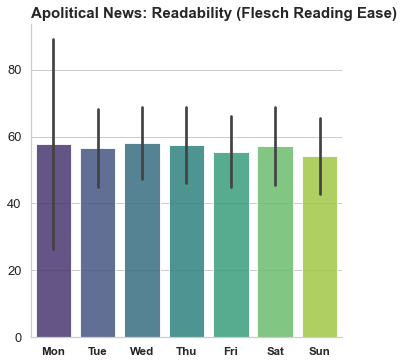

In [9]:
# plot
g = sns.catplot(data=df.query('news_type=="apolitical"'),
                x='day_of_week', y='flesch_reading_ease', 
                order=dow_list,
                ci='sd',
                kind='bar', 
                palette='viridis',
                alpha=.85)

plt.xlabel('')
plt.ylabel('')
g.set_xticklabels(dow_short, fontweight='bold')
plt.yticks(range(0,100,20), size=13)
plt.title('Apolitical News: Readability (Flesch Reading Ease)', fontweight='bold', loc='left', size=15)

save_mpl_fig(os.path.join(SAVEPATH, 'nyt_softnews_lex_dow'))

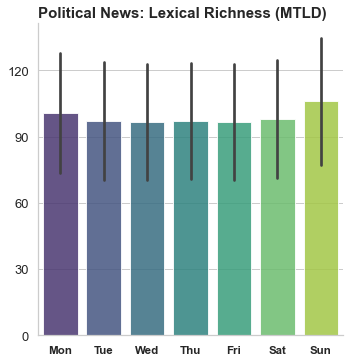

In [10]:
# plot
g = sns.catplot(data=df.query('news_type=="political"'),
                x='day_of_week', y='mtld', 
                order=dow_list,
                ci='sd',
                kind='bar', 
                palette='viridis',
                alpha=.85)

plt.xlabel('')
plt.ylabel('')
g.set_xticklabels(dow_short, fontweight='bold')
plt.yticks(range(0,140,30), size=13)
plt.title('Political News: Lexical Richness (MTLD)', fontweight='bold', loc='left', size=15)

save_mpl_fig(os.path.join(SAVEPATH, 'nyt_hardnews_lex_dow'))

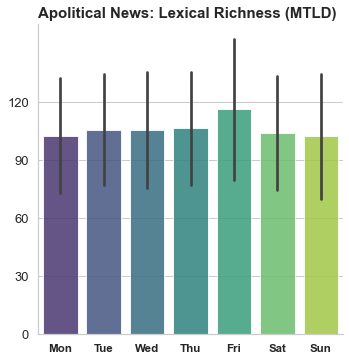

In [11]:
# plot
g = sns.catplot(data=df.query('news_type=="apolitical"'),
                x='day_of_week', y='mtld', 
                order=dow_list,
                ci='sd',
                kind='bar', 
                palette='viridis',
                alpha=.85)

plt.xlabel('')
plt.ylabel('')
g.set_xticklabels(dow_short, fontweight='bold')
plt.yticks(range(0,140,30), size=13)
plt.title('Apolitical News: Lexical Richness (MTLD)', fontweight='bold', loc='left', size=15)

save_mpl_fig(os.path.join(SAVEPATH, 'nyt_softnews_lex_dow'))

### Boxplots

In [12]:
flesch_labels = {10: 'Professional\n(10\u20130)', 
                 30: 'College graduate\n(30\u201310)', 
                 50: 'Some college\n(50\u201330)', 
                 60: '10th to 12th grade\n(60\u201350)', 
                 70: '8th & 9th grade\n(70\u201360)',
                 80: '7th grade\n(80\u201370)', 
                 90: '6th grade\n(90\u201380)'}

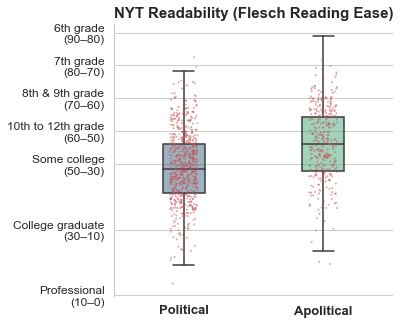

In [13]:
# Plot 
_, ax = plt.subplots(figsize=(5,5))

sns.boxplot(x="news_type", y="flesch_reading_ease", data=df, 
            order=['political', 'apolitical'],
            palette='viridis',
            showfliers=False,
            width=0.3,
            ax=ax)

sns.stripplot(x="news_type", y="flesch_reading_ease", 
              data=df.sample(n=1000, random_state=0, weights='terms'), 
              order=['political', 'apolitical'],              
              jitter=True,
              color="r", 
              alpha=.5,
              size=2,
              ax=ax)

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
    
plt.xlabel('')
plt.ylabel('')
ax.set_xticklabels(['Political', 'Apolitical'], fontweight='bold', size=13)
plt.yticks(list(flesch_labels.keys()), size=12)
ax.set_yticklabels(flesch_labels.values())
plt.title('NYT Readability (Flesch Reading Ease)', fontweight='bold', loc='left', size=15)

sns.despine(bottom=True)

save_mpl_fig(os.path.join(SAVEPATH, 'nyt_boxplot_read'))

In [14]:
df.query('news_type=="political"').flesch_reading_ease.quantile([.75, 0.8, .85])

0.75    56.060992
0.80    57.969625
0.85    60.234037
Name: flesch_reading_ease, dtype: float64

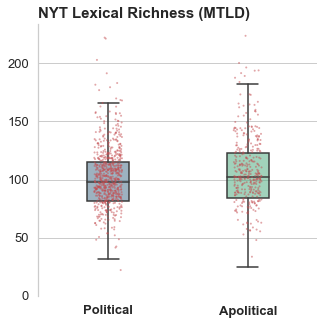

In [15]:
# plot
_, ax = plt.subplots(figsize=(5,5))

sns.boxplot(x="news_type", y="mtld", data=df, 
            order=['political', 'apolitical'],
            palette='viridis',
            showfliers=False,
            width=0.3,
            ax=ax)

sns.stripplot(x="news_type", y="mtld", 
              data=df.sample(n=1000, random_state=0, weights='terms'), 
              order=['political', 'apolitical'],              
              jitter=True,
              color="r", 
              alpha=.5,
              size=2,
              ax=ax)

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
    
plt.xlabel('')
plt.ylabel('')
ax.set_xticklabels(['Political', 'Apolitical'], fontweight='bold', size=13)
plt.yticks(range(0,250,50), size=13)
plt.title('NYT Lexical Richness (MTLD)', fontweight='bold', loc='left', size=15)

sns.despine(bottom=True)
save_mpl_fig(os.path.join(SAVEPATH, 'nyt_boxplot_lex'))